# Multi Armed Bandit

## O que é? 

Multi Armed Bandit (MaB) é uma técnica de aprendizado de máquina que visa maximizar os resultados baseado nas recompensas recebidas durante o experimento.

Para entender melhor o funcionamento do MaB, precisamos saber sua composição:
- **Agente**: O orquestrador das ações.
- **Estado:** São os resultados obtidos por cada banner no momento.
- **Ação:** É a escolha feita pelo Agente de acordo com o Estado do experimento, a tomada de decisão.
    - **Explore:** A ação de Explore tem o objetivo de conhecer melhor o ambiente ou identificar mudanças de comportamento dos usuários.<br>
    - **Exploit:** A ação de Exploit tem o objetivo de eplorar a ação que tem trazido o melhor retorno de acordo com o objetivo.
- **Estratégia:** É o racional de como o Agente vai definir qual é a melhor ação para o presente momento.
- **Recompensa:** Sempre que uma ação atinge algum objetivo, ela recebe alguma recompensa.

Basicamente o MaB vai atuar como um **gerenciador do tráfego do App ou Site**, guiando os usuários para os fluxos que vão te deixar mais próxmo do objetivo definido equilibrando ações de Explore e Exploit aprendidos ao longo do processo do experimento.<br>

O fluxo funcionaria dessa maneira:<br> 

Após a chegada de um novo usuário no App, o **Agente** irá analisar o **Estado** do experimento e, de acordo com a **Estratégia** definida, irá realizar a **Ação** para direcioná-lo ao banner mais indicado, podendo gerar alguma recompensa ou não.<br>
As primeiras iterações vão ser sempre de **Explore**, já que não há conhecimento prévio de qual banner tem a melhor performance de acordo com o objetivo definido. Então o **Agente** irá escolher o banner de forma randômica até que se tenha algum conhecimento sobre suas conversões.   
Ao passar do tempo, com a chegada de novos usuários, o **Agente** tende a escolher o banner que trouxe para ele mais recompensas **(Exploit)** mas sem deixar de explorar outros banners para entender melhor o ambiente ou alguma possível mudança de comportamento, causada por alguma sazonalidade ou nova tendencia.

## Estratégias

### Random

Assim como nos testes A/B, é as ações são escolhidas de forma randômica. Sempre executando ações de **Explore** e nunca **Exploit**. Tomando a decisão de qual é a ação que mais trouxe recompensas somente ao final do experimento.
Aliás, [aqui](https://medium.com/itau-data/multi-armed-bandits-uma-alternativa-para-testes-a-b-d5db47d24006) tem um artigo bem legal comparando o MaB com os testes A/B.



### Greedy

É o contrárido da anterior, a estratégia aqui é sempre escolher a ação que trouxe mais reconpensas. Sempre executando ações de **Exploit** e nunca **Explore**. A decisão de qual é a ação que trouxe maior retorno para o experimento é feita logo no início do experimento, logo quando a primeira recompensa é conquistada.

### EpsilonGreedy

É o meio termo das opções anteriores, onde é definido um valor **ε** para reservar parte do tráfego para as ações de **Explore**. Por exemplo, sabendo que `ε = 0.1`, logo 10% das iterações feitas pelo Agente será reservadas para a Explore e os outros 90% para o Exploit. Aqui a definição de qual é a ação que traz o maior retorno pode variar com o tempo do experimento, já que ele está sempre explorando as outras ações.

### UCB - Upper Confidence Bound

A estratégia UCB não possui valores de **Explore** e **Exploit** pré-definidos, ela parte do princípio de que todas as ações devem ser testadas para que seja possível definir qual delas é a melhor. Para isso, é levado em conta dois fatores: 
 - **Valor estimado da ação:** É basicamente o quanto o Agente espera que a ação vá gerar uma recompensa. Quanto mais recompensa a ação gerar, maior será o valor dela.
 - **Incerteza da ação:** A ação que foi menos escolhida é a que o Agente menos conhece, logo maior será a incerteza quanto aos seus resultados. 

Aqui, ao longo do experimento, tende a ser executada mais vezes a ação com maior retorno **(Exploit)**. Mas a incerteza não permite o Agente de esquecer das outras ações, forçando-o a testar de tempos em tempos **(Explore)**.

<br>

## Mãos à obra:

Vamos ver na prática como funciona e o comportamento das estratégias citadas acima.

Imagine o seguinte problema:
> Você possui um aplicativo e quer adicionar um banner para divulgar alguma ação promocional de um de seus produtos com o objetivo de **maximizar as vendas**.
Sua equipe elabora **5** banners diferentes. Qual banner vai trazer uma melhor performance de vendas?


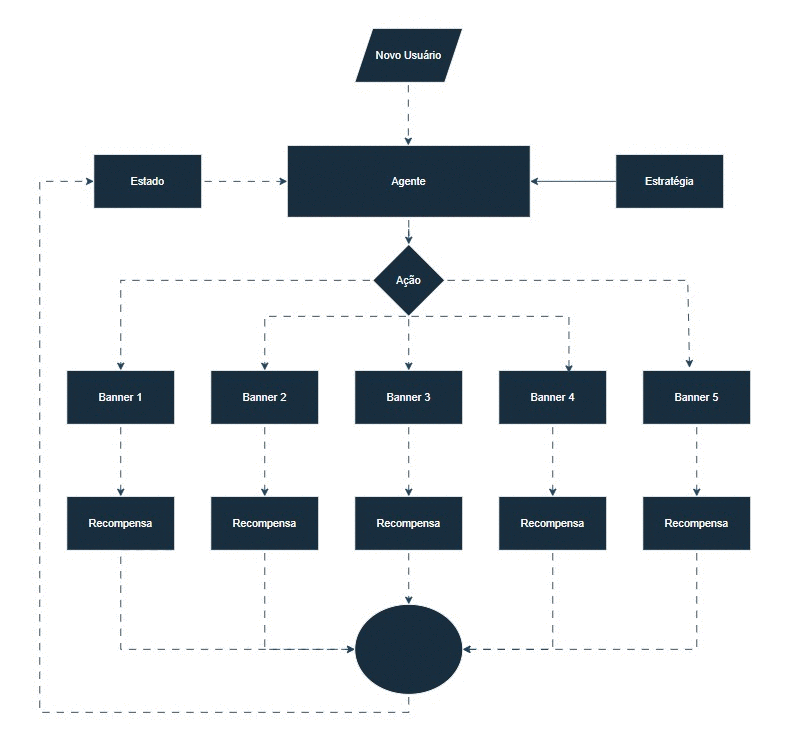

In [1]:
from IPython.display import Image
Image(filename="GIF_MaB.gif")

<br>

<br>

In [24]:
import numpy as np
import pandas as pd
from multi_armed_bandit import MaB
from arm import Arm
from bandit import Bandit
from strategy import EpsilonGreedyStrategy, GreedyStrategy, RandomStrategy, UCB


In [25]:
egreedy = EpsilonGreedyStrategy(epsilon=0.1)
greedy = GreedyStrategy()
random = RandomStrategy()
upper_bound = UCB()

In [26]:
random = RandomStrategy()
mab_random = MaB(random)
random_bandit = mab_random.create_bandit()

mab_random.create_arm(name="banner_1", click_prob=0.1, purchase_prob=0.15)
mab_random.create_arm(name="banner_2", click_prob=0.25, purchase_prob=0.08)
mab_random.create_arm(name="banner_3", click_prob=0.15, purchase_prob=0.1)
mab_random.create_arm(name="banner_4", click_prob=0.2, purchase_prob=0.06)
mab_random.create_arm(name="banner_5", click_prob=0.13, purchase_prob=0.12)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
def plot_total_reward_over_time(bandit_strategy,arms_rewards, arms):
    df = pd.DataFrame(data = arms_rewards, columns=arms)
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 5))
    
    plt.title(f'{bandit_strategy} Strategy: Total Reward over time', fontsize=16)
    plt.xlabel('Steps', fontsize=14)
    plt.ylabel('Total Reward', fontsize=14)

    plt.tight_layout()
    colors = sns.color_palette("Set2", df.shape[1])

    sns.lineplot(data=df, palette = "Set2"  ,linestyle='-', linewidth=2);


In [39]:
def plot_share_arms_over_time(bandit_strategy,arms_rewards, arms):
    df = pd.DataFrame(data = arms_rewards, columns=arms)
    df_stack = df.divide(df.sum(axis=1), axis=0)
    colors = sns.color_palette("Set2", df.shape[1])
    ax = df_stack.plot(kind='area', figsize=(20,5),stacked=True, color=colors )

    ax.set_ylabel('Percent (%)')
    ax.margins(0, 0) # Set margins to avoid "whitespace"
    plt.title(f'{bandit_strategy} Strategy: 100 % stacked area chart', fontsize=16)
    plt.xlabel('Steps', fontsize=14)
    plt.tight_layout()
    plt.show()


In [23]:
tela_1 = Arm(name="banner_1", click_prob=0.1, purchase_prob=0.15)
tela_2 = Arm(name="banner_2", click_prob=0.25, purchase_prob=0.08)
tela_3 = Arm(name="banner_3", click_prob=0.15, purchase_prob=0.1)
tela_4 = Arm(name="banner_4", click_prob=0.2, purchase_prob=0.06)
tela_5 = Arm(name="banner_5", click_prob=0.13, purchase_prob=0.12)

arms = [tela_1,tela_2,tela_3,tela_4,tela_5]

### Strategy

In [203]:
egreedy = EpsilonGreedyStrategy(epsilon=0.1)
greedy = GreedyStrategy()
random = RandomStrategy()
upper_bound = UCB()

### Bandit

In [204]:
egreedy_bandit = Bandit(strategy=egreedy)
greedy_bandit = Bandit(strategy=greedy)
random_bandit = Bandit(strategy=random)
ucb_bandit = Bandit(strategy=upper_bound)

bandits = [egreedy_bandit, greedy_bandit, random_bandit, ucb_bandit]

In [205]:
for bandit in bandits:
    for arm in arms:
        bandit.add_arm(arm)

### Criando os banners

Vamos criar os 5 banners do problema para a simulação. Para cada um, atribuir uma probabilidade de clique e a probabilidade de compra, caso o clique tenha ocorrido.

- **Banner 1**: 10% de chance de clique e 15% compra
- **Banner 2:** 25% de chance de clique e 8% compra
- **Banner 3:** 15% de chance de clique e 10% compra
- **Banner 4:** 20% de chance de clique e 6% compra
- **Banner 5:** 13% de chance de clique e 12% compra

### Estratégia: Random

In [28]:
ramdom_rewards = play(random_bandit, 10000)

banner_1 - total rewards: 816 - Mean Rewards: 0.42105263157894735
banner_2 - total rewards: 998 - Mean Rewards: 0.5091836734693878
banner_3 - total rewards: 952 - Mean Rewards: 0.4646168862859932
banner_4 - total rewards: 793 - Mean Rewards: 0.3765432098765432
banner_5 - total rewards: 936 - Mean Rewards: 0.48073959938366717


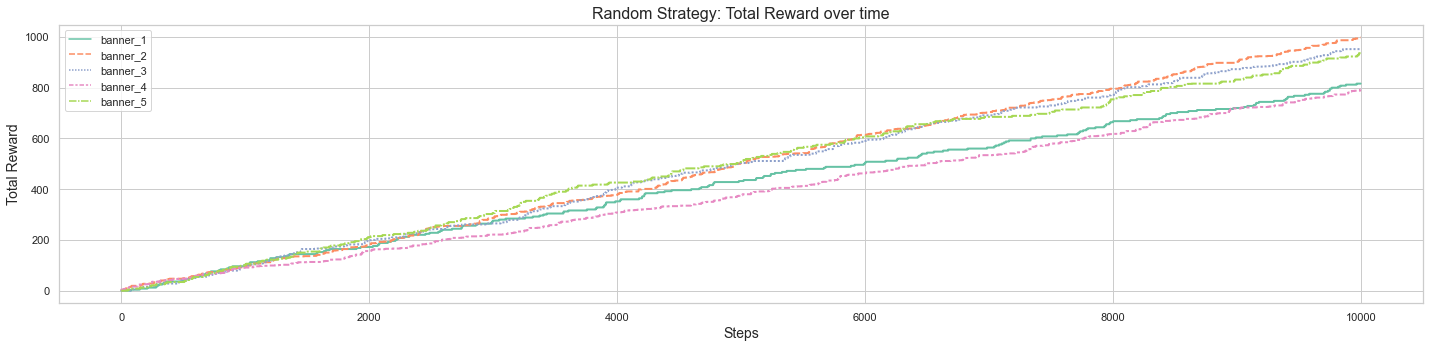

In [35]:
plot_total_reward_over_time("Random" ,ramdom_rewards,arms)

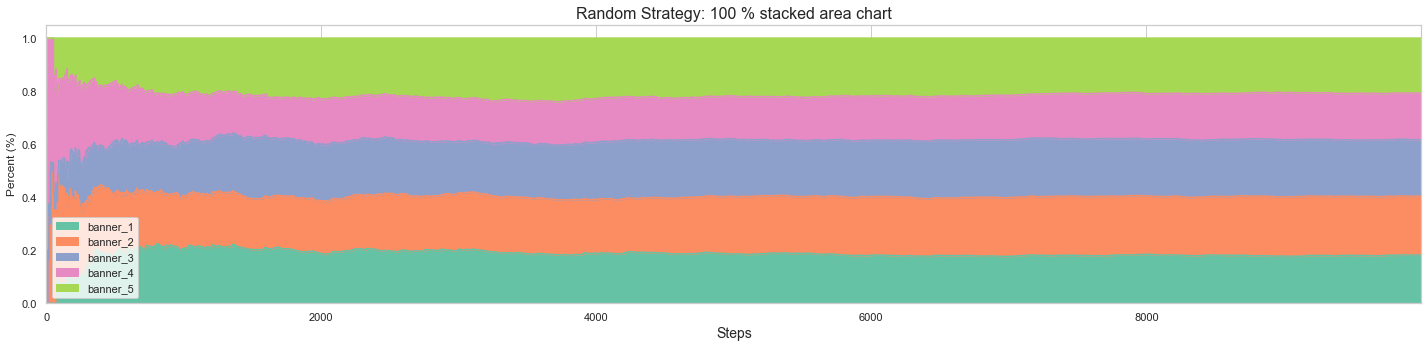

In [40]:
plot_share_arms_over_time("Random" ,ramdom_rewards,arms)

<br>

### Estratégia: Greedy

In [45]:
greedy = GreedyStrategy()
mab_greedy = MaB(greedy)
greedy_bandit = mab_greedy.create_bandit()

mab_greedy.create_arm(name="banner_1", click_prob=0.1, purchase_prob=0.15)
mab_greedy.create_arm(name="banner_2", click_prob=0.25, purchase_prob=0.08)
mab_greedy.create_arm(name="banner_3", click_prob=0.15, purchase_prob=0.1)
mab_greedy.create_arm(name="banner_4", click_prob=0.2, purchase_prob=0.06)
mab_greedy.create_arm(name="banner_5", click_prob=0.13, purchase_prob=0.12)

In [46]:
greedy_rewards = play(greedy_bandit, 10000)

banner_1 - total rewards: 4052 - Mean Rewards: 0.4052
banner_2 - total rewards: 0 - Mean Rewards: 0
banner_3 - total rewards: 0 - Mean Rewards: 0
banner_4 - total rewards: 0 - Mean Rewards: 0
banner_5 - total rewards: 0 - Mean Rewards: 0


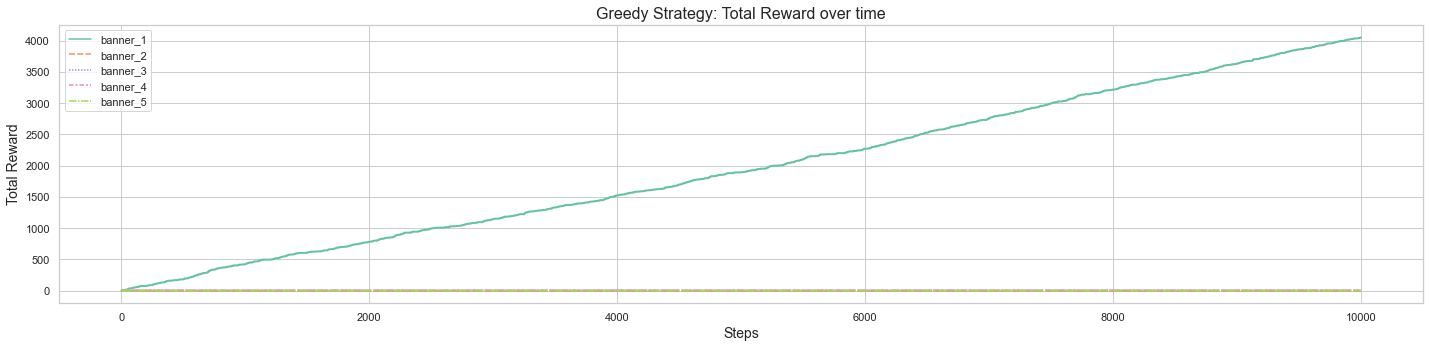

In [47]:
plot_total_reward_over_time("Greedy" ,greedy_rewards,arms)

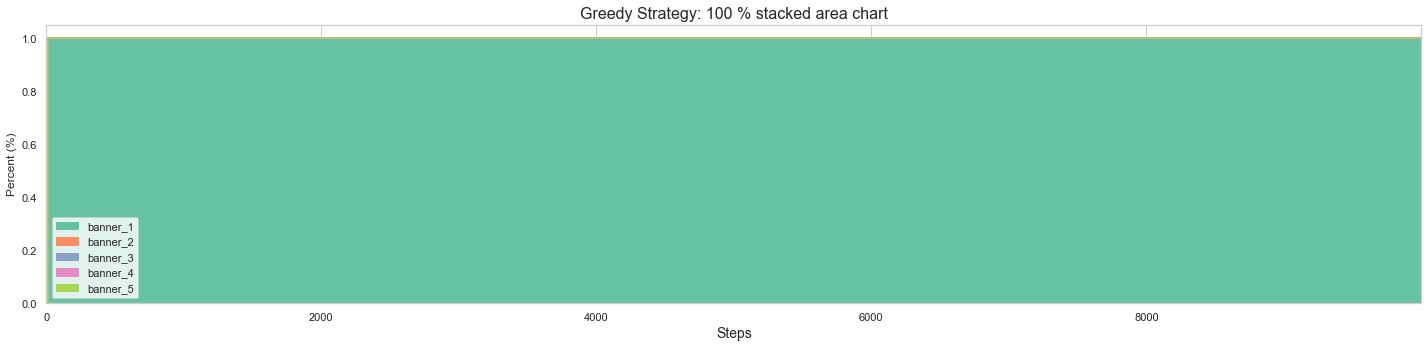

In [48]:
plot_share_arms_over_time("Greedy" ,greedy_rewards,arms)

### Estratégia: E-Greedy

In [50]:
egreedy = EpsilonGreedyStrategy(epsilon=0.1)
mab_egreedy = MaB(egreedy)
egreedy_bandit = mab_egreedy.create_bandit()

mab_egreedy.create_arm(name="banner_1", click_prob=0.1, purchase_prob=0.15)
mab_egreedy.create_arm(name="banner_2", click_prob=0.25, purchase_prob=0.08)
mab_egreedy.create_arm(name="banner_3", click_prob=0.15, purchase_prob=0.1)
mab_egreedy.create_arm(name="banner_4", click_prob=0.2, purchase_prob=0.06)
mab_egreedy.create_arm(name="banner_5", click_prob=0.13, purchase_prob=0.12)

In [51]:
egreedy_rewards = play(egreedy_bandit, 10000)

banner_1 - total rewards: 284 - Mean Rewards: 0.42011834319526625
banner_2 - total rewards: 153 - Mean Rewards: 0.40691489361702127
banner_3 - total rewards: 381 - Mean Rewards: 0.4715346534653465
banner_4 - total rewards: 79 - Mean Rewards: 0.3237704918032787
banner_5 - total rewards: 3992 - Mean Rewards: 0.5055724417426545


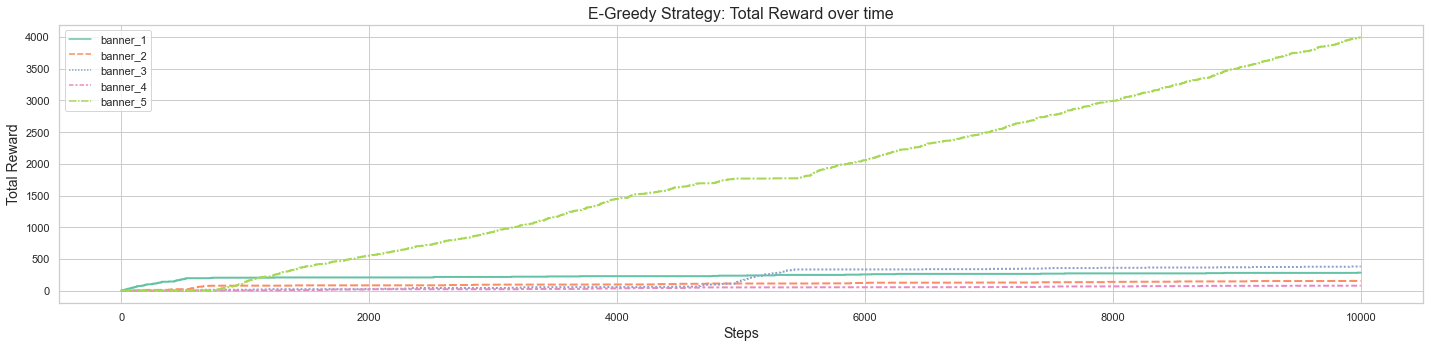

In [57]:
plot_total_reward_over_time("E-Greedy" ,egreedy_rewards,arms)

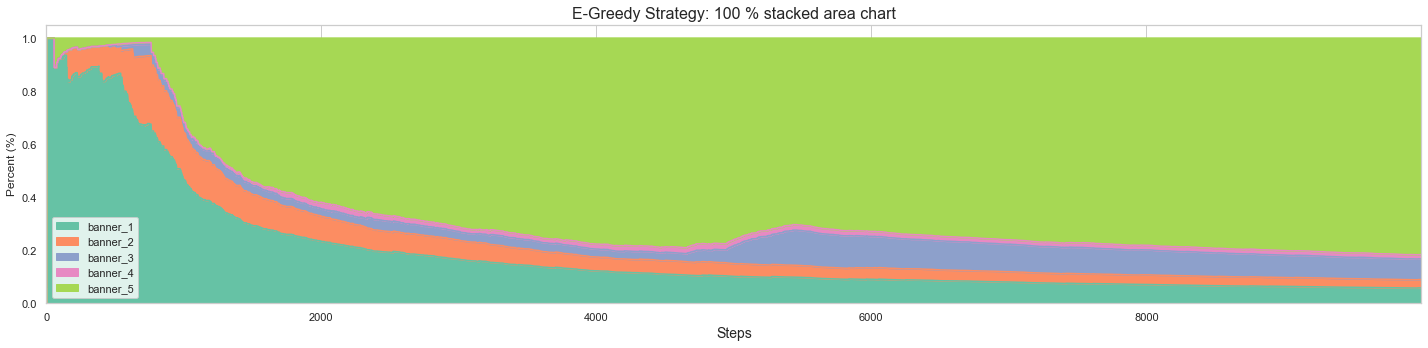

In [58]:
plot_share_arms_over_time("E-Greedy" ,egreedy_rewards,arms)

### Estratégia: UCB

In [94]:
upper_bound = UCB()
mab_ucb = MaB(upper_bound)
ucb_bandit = mab_ucb.create_bandit()

mab_ucb.create_arm(name="banner_1", click_prob=0.1, purchase_prob=0.15)
mab_ucb.create_arm(name="banner_2", click_prob=0.25, purchase_prob=0.08)
mab_ucb.create_arm(name="banner_3", click_prob=0.15, purchase_prob=0.1)
mab_ucb.create_arm(name="banner_4", click_prob=0.2, purchase_prob=0.06)
mab_ucb.create_arm(name="banner_5", click_prob=0.13, purchase_prob=0.12)

In [95]:
ucb_rewards = play(ucb_bandit, 10000)

banner_1 - total rewards: 172 - Mean Rewards: 0.3282442748091603
banner_2 - total rewards: 695 - Mean Rewards: 0.44071020925808496
banner_3 - total rewards: 972 - Mean Rewards: 0.46110056925996207
banner_4 - total rewards: 375 - Mean Rewards: 0.395987328405491
banner_5 - total rewards: 2471 - Mean Rewards: 0.5101156069364162


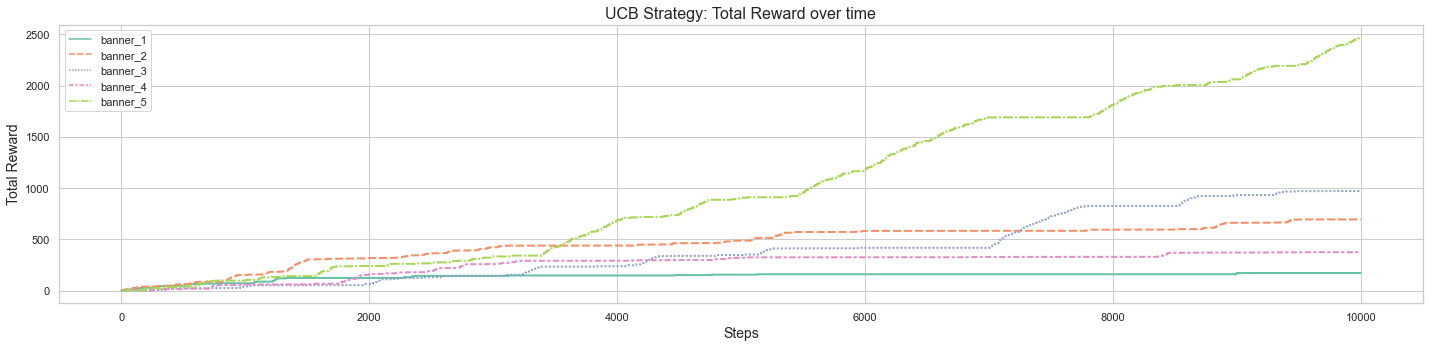

In [96]:
plot_total_reward_over_time("UCB" ,ucb_rewards,arms)

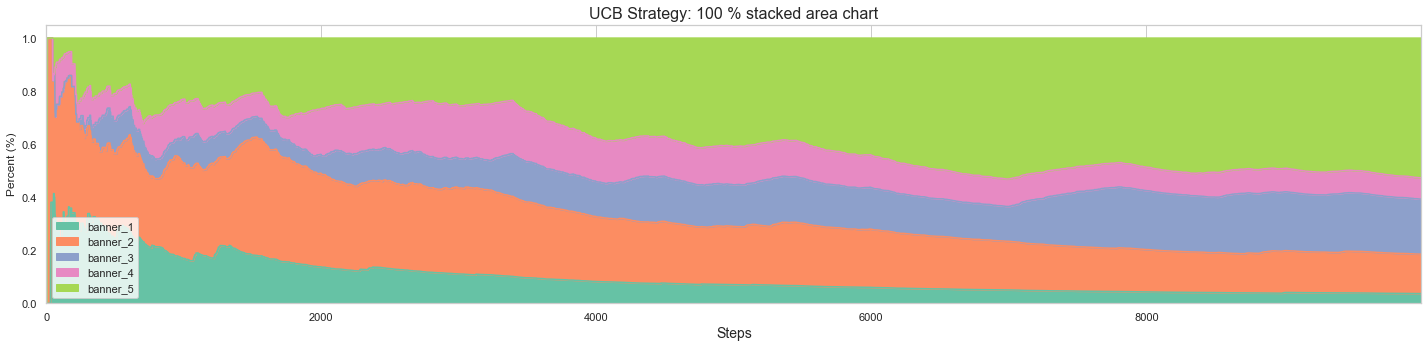

In [97]:
plot_share_arms_over_time("UCB" ,ucb_rewards,arms)

### Play

In [16]:
def get_arm_total_reward(arms):
    list_of_total_rewards = []
    for arm in arms:
        list_of_total_rewards.append(arm.total_reward)
        
        
    return list_of_total_rewards

In [15]:
def play(bandit,number_of_steps):
    arms_rewards = []
    for step in range(number_of_steps):
        bandit.play()
        rewards = get_arm_total_reward(bandit.arms)
        arms_rewards.append(rewards)
    for arm in bandit.arms:
        print(arm.summary())
        
    return arms_rewards

In [10]:
def play_x_epochs(bandit, number_of_steps, number_of_epochs):
    
    best_arm_list = []
    best_arm_summary_list = [] 
    total_reward_list = []
    
    for epoch in range(number_of_epochs):
        
        play(bandit,number_of_steps)
        best_arm = bandit.get_best_arm()
        total_reward = bandit.get_total_reward()
        
        best_arm_list.append(best_arm.name)
        best_arm_summary_list.append(best_arm.summary())
        total_reward_list.append(total_reward)
        
        bandit.reset_arms()
        
        data = {'tela': best_arm_list, 'details': best_arm_summary_list, 'total_reward': total_reward_list}
        
        df = pd.DataFrame(data = data)

        
    return df


In [104]:
ucb_bandit.reset_arms()

banner_1 - total rewards: 1656 - Mean Rewards: 0.4050880626223092
banner_2 - total rewards: 1832 - Mean Rewards: 0.4516765285996055
banner_3 - total rewards: 1965 - Mean Rewards: 0.4957114026236125
banner_4 - total rewards: 1480 - Mean Rewards: 0.37997432605905007
banner_5 - total rewards: 2165 - Mean Rewards: 0.5416562421816362


In [95]:
df = play_x_epochs(ucb_bandit, number_of_steps, 10)

banner_1 - total rewards: 152 - Mean Rewards: 0.3146997929606625
banner_2 - total rewards: 658 - Mean Rewards: 0.45006839945280436
banner_3 - total rewards: 853 - Mean Rewards: 0.4691969196919692
banner_4 - total rewards: 147 - Mean Rewards: 0.3107822410147992
banner_5 - total rewards: 3120 - Mean Rewards: 0.5412907702984039
banner_1 - total rewards: 408 - Mean Rewards: 0.4075924075924076
banner_2 - total rewards: 1001 - Mean Rewards: 0.4766666666666667
banner_3 - total rewards: 530 - Mean Rewards: 0.42984590429845904
banner_4 - total rewards: 168 - Mean Rewards: 0.3218390804597701
banner_5 - total rewards: 2736 - Mean Rewards: 0.5318818040435459
banner_1 - total rewards: 432 - Mean Rewards: 0.4122137404580153
banner_2 - total rewards: 1433 - Mean Rewards: 0.4982614742698192
banner_3 - total rewards: 391 - Mean Rewards: 0.40350877192982454
banner_4 - total rewards: 237 - Mean Rewards: 0.35639097744360904
banner_5 - total rewards: 2328 - Mean Rewards: 0.5240882485366952
banner_1 - total

In [96]:
best_arm = ucb_bandit.get_best_arm()
best_arm.summary()

'banner_1 - total rewards: 0 - Mean Rewards: 0'

### Visualization

In [120]:
df = pd.DataFrame(data = arms_rewards, columns=arms)

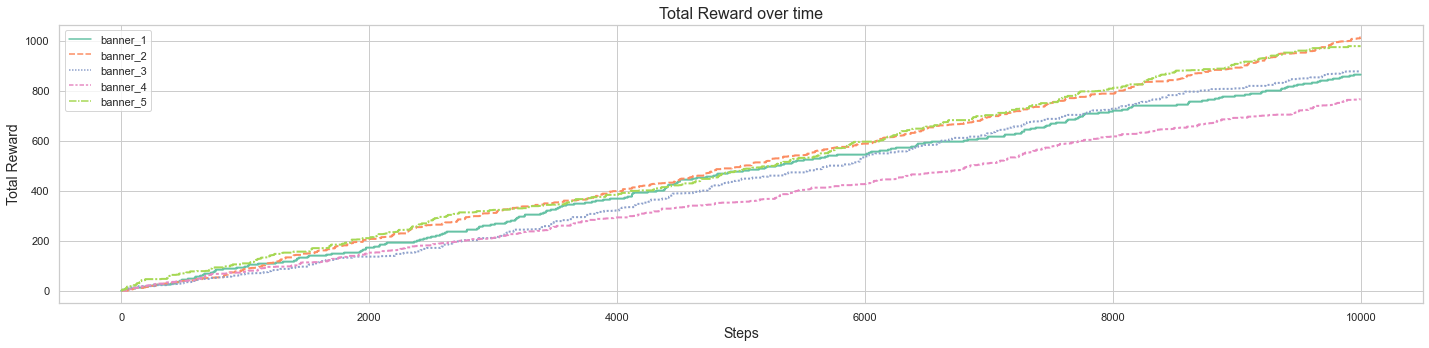

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))
#
plt.title('Total Reward over time', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)

plt.tight_layout()
colors = sns.color_palette("Set2", df.shape[1])

sns.lineplot(data=df, palette = "Set2"  ,linestyle='-', linewidth=2);


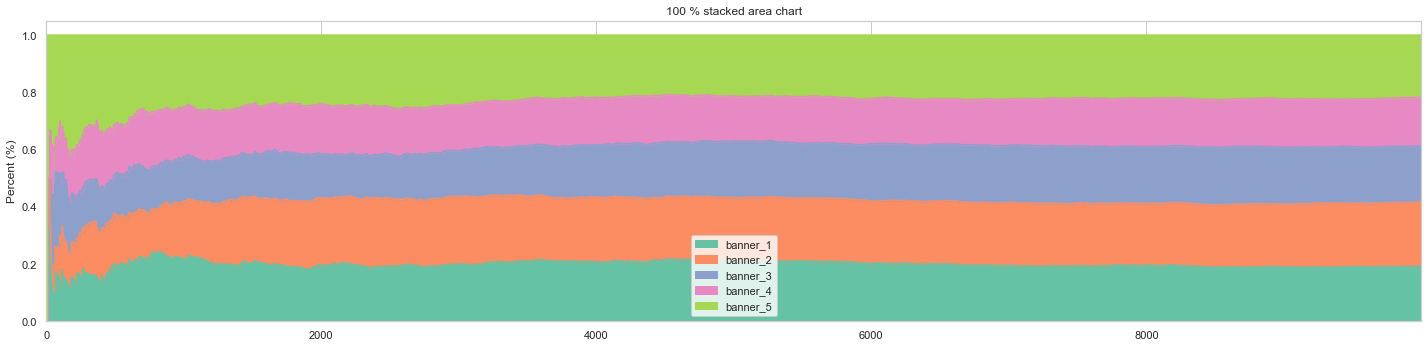

In [122]:
df_stack = df.divide(df.sum(axis=1), axis=0)
ax = df_stack.plot(kind='area', figsize=(20,5),stacked=True, title='100 % stacked area chart',color=colors )

ax.set_ylabel('Percent (%)')
ax.margins(0, 0) # Set margins to avoid "whitespace"
plt.tight_layout()
plt.show()
